In [ ]:
from gensim.models import Word2Vec
import numpy as np

In [68]:
model = Word2Vec.load("model_save/karate_word2vec_deepwalk.model")
# model = Word2Vec.load("model_save/karate_word2vec_node2vec.model")
# model = Word2Vec.load("model_save/karate_word2vec.model")
words = model.wv.index_to_key
# Sort the words list
sorted_words = sorted(words)
# Get embeddings for the sorted words
sorted_embeddings = [model.wv[word] for word in sorted_words]
concatenated_embeddings = np.stack(sorted_embeddings, axis=0)
print(concatenated_embeddings.shape)

(68, 128)


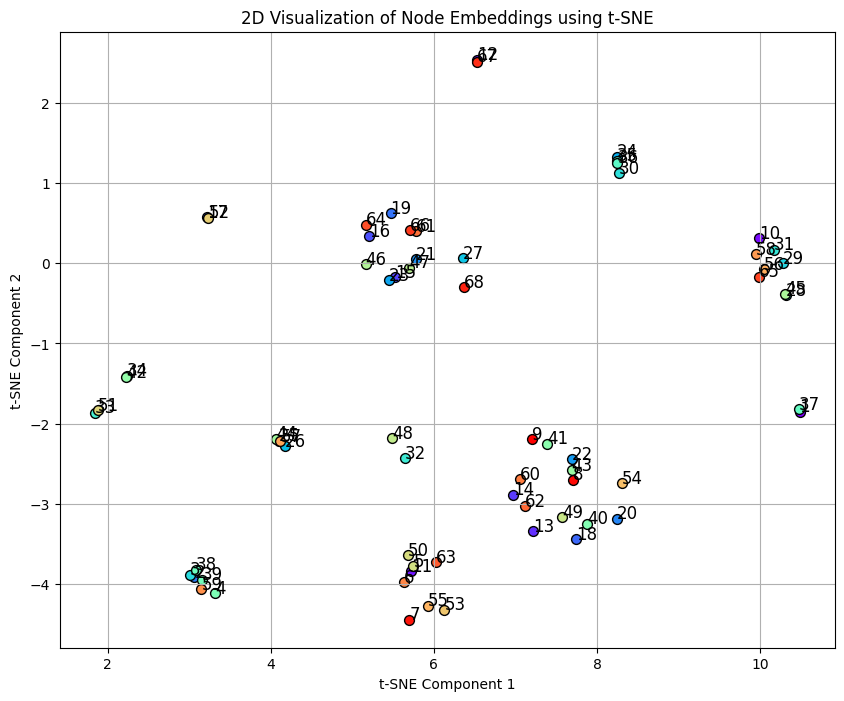

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the concatenated embeddings
tsne_embeddings = tsne.fit_transform(concatenated_embeddings)

# Generate a list of colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(sorted_words)))

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(sorted_words):
    plt.scatter(
        tsne_embeddings[i, 0],
        tsne_embeddings[i, 1],
        color=colors[i],
        edgecolors="k",
        s=50,
    )
    plt.annotate(
        str(int(word)), (tsne_embeddings[i, 0], tsne_embeddings[i, 1]), fontsize=12
    )
plt.title("2D Visualization of Node Embeddings using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

/Users/lijinliang/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


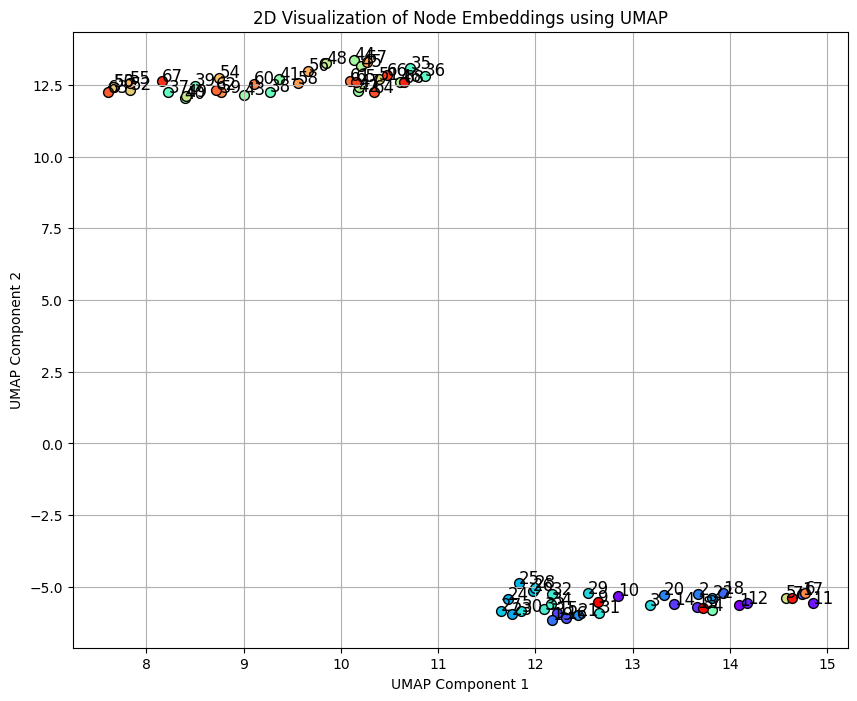

In [69]:
import umap.umap_ as umap  # 正确导入方式

# Initialize UMAP with 2 components
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=20, min_dist=0.01)

# Fit and transform the concatenated embeddings
umap_embeddings = umap_model.fit_transform(concatenated_embeddings)

# 可视化降维后的嵌入
plt.figure(figsize=(10, 8))
for i, word in enumerate(sorted_words):
    plt.scatter(
        umap_embeddings[i, 0],
        umap_embeddings[i, 1],
        color=colors[i],
        edgecolors="k",
        s=50,
    )
    plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=12)
plt.title("2D Visualization of Node Embeddings using UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.show()

In [ ]:
from gensim.models import KeyedVectors

# Load the word vectors from the .wv.formate file
word_vectors = KeyedVectors.load_word2vec_format(
    "model_save/karate-mirrored.emb", binary=False
)

# Get the list of words in the vocabulary
words = word_vectors.index_to_key
# Sort the words list
sorted_words = sorted(words)

# Get embeddings for the sorted words
sorted_embeddings = [word_vectors[word] for word in sorted_words]

# Concatenate the sorted embeddings
concatenated_embeddings = np.stack(sorted_embeddings, axis=0)
print(concatenated_embeddings.shape)

(68, 128)


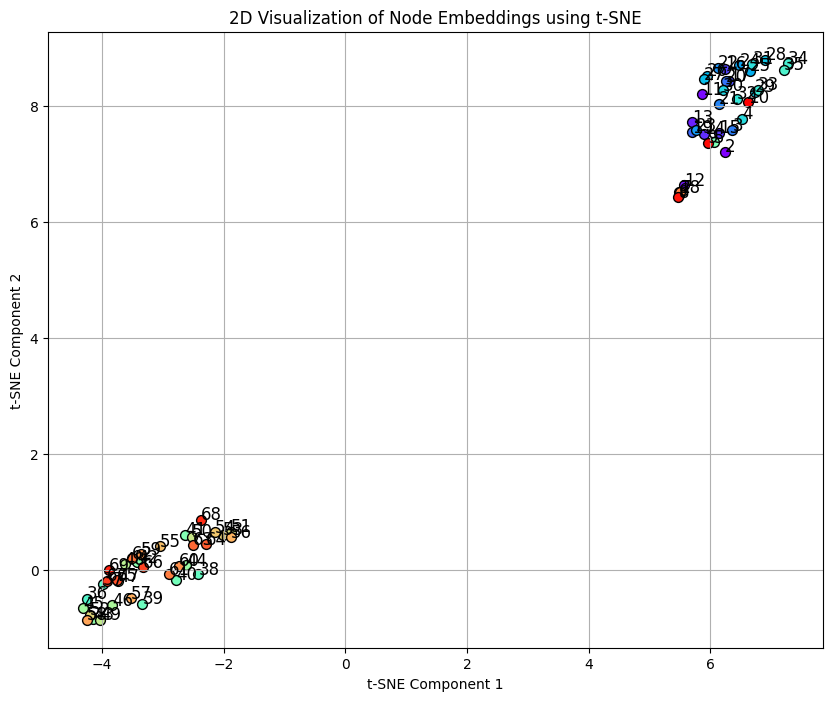

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the concatenated embeddings
tsne_embeddings = tsne.fit_transform(concatenated_embeddings)

# Generate a list of colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(sorted_words)))

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(sorted_words):
    plt.scatter(
        tsne_embeddings[i, 0],
        tsne_embeddings[i, 1],
        color=colors[i],
        edgecolors="k",
        s=50,
    )
    plt.annotate(
        str(int(word) + 1), (tsne_embeddings[i, 0], tsne_embeddings[i, 1]), fontsize=12
    )
plt.title("2D Visualization of Node Embeddings using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算余弦相似度矩阵
cosine_sim_matrix = cosine_similarity(concatenated_embeddings)

# 找到每个节点与之余弦相似度最接近的另一个点
closest_points = {}
for idx, row in enumerate(cosine_sim_matrix):
    # 排除自身，找到相似度最高的点
    closest_idx = row.argsort()[-2]
    closest_points[sorted_words[idx]] = sorted_words[closest_idx]
# 计算正确率
correct_count = 0
for node, closest_node in closest_points.items():
    if abs(int(node) - int(closest_node)) == 34:
        correct_count += 1

accuracy = correct_count / len(closest_points)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.01


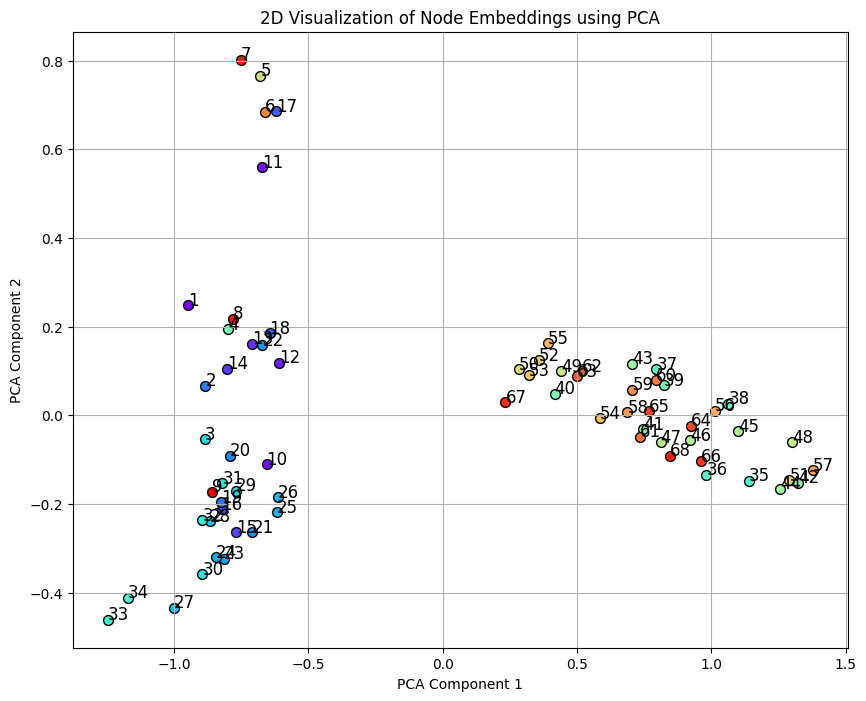

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用PCA将嵌入降维到2维
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(concatenated_embeddings)

# 可视化降维后的嵌入
plt.figure(figsize=(10, 8))
for i, word in enumerate(sorted_words):
    plt.scatter(
        pca_embeddings[i, 0],
        pca_embeddings[i, 1],
        color=colors[i],
        edgecolors="k",
        s=50,
    )
    plt.annotate(word, (pca_embeddings[i, 0], pca_embeddings[i, 1]), fontsize=12)
plt.title("2D Visualization of Node Embeddings using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()